<a href="https://colab.research.google.com/github/antonyYG/ventas_publicidad/blob/main/Ventas_publicidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow==2.18.0 tensorflowjs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
fechas = np.arange(start='2010-01-01', stop='2025-01-01', dtype='datetime64[D]')
fechas

array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2024-12-29',
       '2024-12-30', '2024-12-31'], dtype='datetime64[D]')

In [5]:
# Lista de productos
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto E']

# Asignar un producto aleatorio a cada fecha
np.random.seed(42)  # Para reproducibilidad
n_filas = len(fechas)
productos_random = np.random.choice(productos, size=n_filas)
precio = np.random.randint(10, 100, size=n_filas)
cantida = np.random.randint(10, 100, size=n_filas)
publicidad = np.random.randint(10,100,size=n_filas)
stock = np.random.randint(10,20,size=n_filas)
df = pd.DataFrame({
    'Fecha': fechas,
    'Producto': productos_random,
    'Precio': precio,
    'Cantidad': cantida,
    'Publicidad': publicidad,
    'Stock': stock
})
df

,Fecha,Producto,Precio,Cantidad,Publicidad,Stock
0,2010-01-01,Producto D,24,34,62,14
1,2010-01-02,Producto E,80,68,55,16
2,2010-01-03,Producto C,38,88,54,14
3,2010-01-04,Producto E,12,95,18,10
4,2010-01-05,Producto E,92,15,15,18
...,...,...,...,...,...,...
5474,2024-12-27,Producto E,16,11,79,14
5475,2024-12-28,Producto C,44,92,47,16
5476,2024-12-29,Producto B,24,42,63,13
5477,2024-12-30,Producto C,74,30,69,15


In [7]:
df.loc[df['Producto'] == 'Producto A', 'Precio']

,Precio
18,56
23,54
24,17
33,80
38,33
...,...
5454,19
5460,38
5461,21
5467,21


In [18]:
df.loc[df['Cantidad'] == df['Cantidad'].max(),['Producto','Cantidad']]

,Producto,Cantidad
159,Producto C,99
164,Producto C,99
248,Producto D,99
266,Producto D,99
349,Producto E,99
580,Producto D,99
603,Producto D,99
670,Producto C,99
781,Producto A,99
1260,Producto E,99


In [19]:
df.groupby('Producto')['Precio'].mean()

,Precio
Producto,
Producto A,55.148452
Producto B,54.879245
Producto C,56.129630
Producto D,55.396260
Producto E,54.762075


In [20]:
df.groupby('Producto')['Precio'].max()

,Precio
Producto,
Producto A,99
Producto B,99
Producto C,99
Producto D,99
Producto E,99


In [21]:
df['total'] = df['Precio'] * df['Cantidad']
df

,Fecha,Producto,Precio,Cantidad,Publicidad,Stock,total
0,2010-01-01,Producto D,24,34,62,14,816
1,2010-01-02,Producto E,80,68,55,16,5440
2,2010-01-03,Producto C,38,88,54,14,3344
3,2010-01-04,Producto E,12,95,18,10,1140
4,2010-01-05,Producto E,92,15,15,18,1380
...,...,...,...,...,...,...,...
5474,2024-12-27,Producto E,16,11,79,14,176
5475,2024-12-28,Producto C,44,92,47,16,4048
5476,2024-12-29,Producto B,24,42,63,13,1008
5477,2024-12-30,Producto C,74,30,69,15,2220


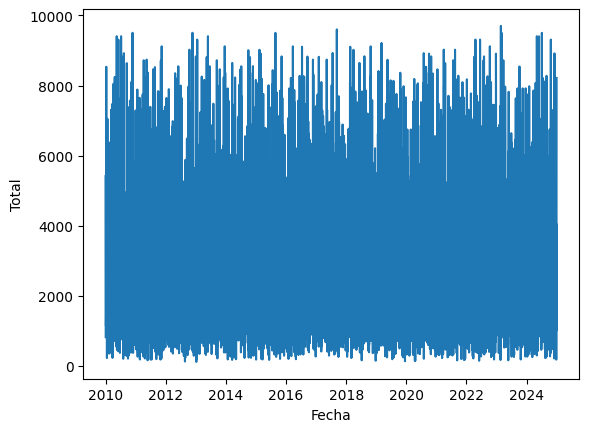

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [33]:
fig, ax = plt.subplots()
ax.plot(df['Fecha'], df['total'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Total')
plt.show()
plt.close

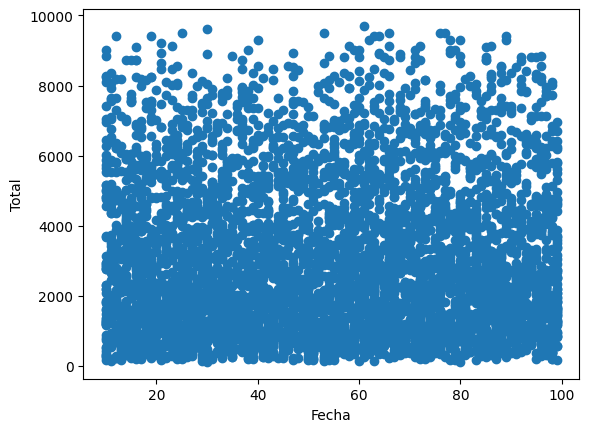

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['Publicidad'], df['total'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Total')
plt.show()
plt.close

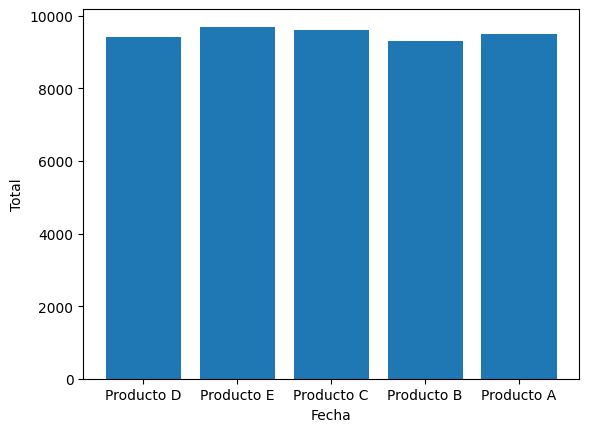

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [43]:
fig, ax = plt.subplots()
ax.bar(df['Producto'], df['total'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Total')
plt.show()
plt.close

In [44]:
df['total'].mean()

np.float64(3011.475634239825)

In [45]:
df['total'].median()

2464.0

In [46]:
df['total'].std()

2137.162612146978

In [48]:
X = df[['Publicidad', 'Stock']].values  # entradas
y = df['total'].values  # salida

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear modelo
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))  # capa oculta con 10 neuronas
model.add(Dense(1, activation='linear'))  # capa de salida (regresión)

# Compilar modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12893388.0000 - mae: 2909.9692 - val_loss: 13196489.0000 - val_mae: 2952.5701
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12720234.0000 - mae: 2850.1323 - val_loss: 12780751.0000 - val_mae: 2880.8049
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12704221.0000 - mae: 2831.7864 - val_loss: 12285587.0000 - val_mae: 2793.6731
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11707474.0000 - mae: 2687.0735 - val_loss: 11706117.0000 - val_mae: 2690.3142
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11157908.0000 - mae: 2577.8701 - val_loss: 11050609.0000 - val_mae: 2572.2563
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11168197.0000 - mae: 2562.1296 - val_loss: 10351127.0000 - val_mae: 2447.0862
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9794727.0000 - mae: 2350.1948 - val_loss: 9643257.0000 - val_mae: 2326.0737
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━

In [51]:
# Evaluar en datos de prueba
loss, mae = model.evaluate(X_test, y_test)
print("MAE:", mae)

# Predecir nuevas ventas
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5610432.5000 - mae: 1912.9736
MAE: 1842.982666015625
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
model.save("model.h5")
print("Modelo guardado ✅")

Modelo guardado ✅
